# Problema familias

Cual es la probabilidad de **encontrar una familia sin hijos hombres** en las **familias con tres hijos**?

Importamos librerías

In [10]:
import random
import numpy as np
import pandas as pd
import seaborn as sns

Creamos una clase familia que tendrá cierto numero de hijos (`number_sons`) en orden pero con sexo aleatorio, las variables `man_number` y `woman_number` nos permitirán acceder mas rápido a la información.

In [11]:
class Family:
    def __init__(self, number_sons: int):
        self.sons = np.array(['m' if random.random() >= 0.5 else 'w' for _ in range(number_sons)])
        self.man_number = 0
        self.woman_number = 0
        for son in self.sons:
            if son == 'm':
                self.man_number += 1
            if son == 'w':
                self.woman_number += 1

Creamos una familia de prueba e imprimimos sus valores

In [12]:
test_family = Family(3)
print(f'{test_family.man_number= }\n{test_family.woman_number= }')

test_family.man_number= 3
test_family.woman_number= 0


Ahora se generan mil familias aleatorias con 3 hijos

In [13]:
population = [Family(3) for _ in range(100000)]

Ahora con la información de nuestra población y creamos una tabla

In [14]:
population_df = pd.DataFrame({
    'family': list(range(1, len(population) + 1)),
    'man_number': [family.man_number for family in population],
    'woman_number': [family.woman_number for family in population]
})

population_df.head()

,family,man_number,woman_number
0,1,0,3
1,2,0,3
2,3,2,1
3,4,2,1
4,5,3,0


Contamos la frecuencia de cada numero de hombres por familia

In [15]:
(
    population_df
    .man_number
    .value_counts()
    .reset_index()
    .rename(columns={
    'index': 'men_in_family',
    'man_number': 'frequency'
    })
    .sort_values('men_in_family')
)

,men_in_family,frequency
2,0,12435
0,1,37571
1,2,37570
3,3,12424


Gráficamos el numero de hombres por familia

<Axes: xlabel='men_in_family', ylabel='frequency'>

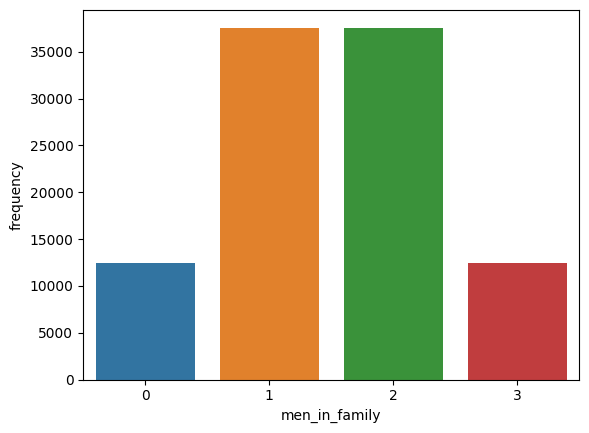

In [16]:
(
    population_df
    .man_number
    .value_counts()
    .reset_index()
    .rename(columns={
    'index': 'men_in_family',
    'man_number': 'frequency'
    })
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'men_in_family',
                y= 'frequency'
            )
        )
    )
)

# Probabilidad para 2 hijos de tener al menos 1

Generamos una población de personas con dos hijos

In [17]:
population2 = [Family(2) for _ in range(100000)]

Ahora con la información de nuestra población y creamos una tabla

In [18]:
population2_df = pd.DataFrame({
    'family': list(range(1, len(population2) + 1)),
    'man_number': [family.man_number for family in population2],
    'woman_number': [family.woman_number for family in population2]
})

population2_df.head()

,family,man_number,woman_number
0,1,1,1
1,2,0,2
2,3,0,2
3,4,2,0
4,5,1,1


Contamos la frecuencia de cada numero de hombres por familia

In [19]:
(
    population2_df
    .man_number
    .value_counts()
    .reset_index()
    .rename(columns={
    'index': 'men_in_family',
    'man_number': 'frequency'
    })
    .sort_values('men_in_family')
)

,men_in_family,frequency
2,0,25002
0,1,49924
1,2,25074


Gráficamos el numero de hombres por familia

<Axes: xlabel='men_in_family', ylabel='frequency'>

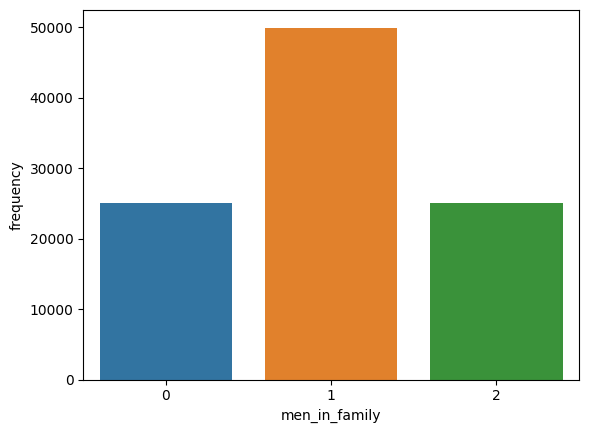

In [20]:
(
    population2_df
    .man_number
    .value_counts()
    .reset_index()
    .rename(columns={
    'index': 'men_in_family',
    'man_number': 'frequency'
    })
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'men_in_family',
                y= 'frequency'
            )
        )
    )
)